# Matplotlib tutorial

### Matplotlib basics

A `Figure` is the top-level container for all plot elements.  
A `Figure` contains some subplots called `Axes` on several rows/columns.  
An `Axes` can have a title, legend, x/y axis labels. 
An `Axes` contains 2 `Axis` objects, or 3 for 3D plots.  
An `Axis` defines the min/max values on the axis, the ticks and ticks labels (configured with `Location` and `Formatter` objects).  
An `Artist` object is any object drawn on the canvas (`Figure`, `Axes`, `Axis`, `Text`, `Line2D` ...).

Usually we must define a figure and its subplots, then configure each `Axes` to represent what we want.  
In case of a single subplot we can use the `plt` object directly instead.

Plots take as input some numpy arrays.

### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Creation of a figure and its axes

`subplots(2, 3)` splits the figure into 6 subplots (2 rows and 3 columns).  
`subplots()` uses 1 single subplot by default.  
`subplots()` returns the figure and an array of `Axes` objects (one for each subplot).

To simply draw a line, use `Axes.plot(X, Y)` (if X is omitted it uses `range(len(Y))` :

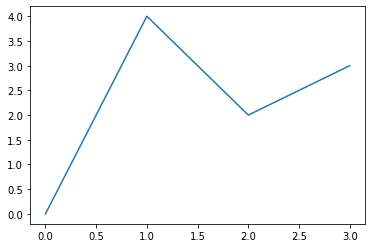

In [3]:
fig, ax = plt.subplots()
ax.plot([0, 4, 2, 3])

For a single subplot we can simple use :

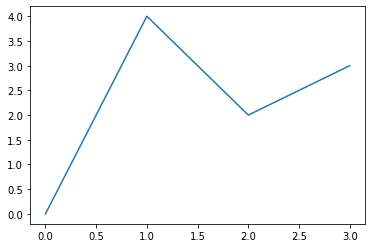

In [4]:
plt.plot([0, 4, 2, 3])

Example of multi-subplots figure :

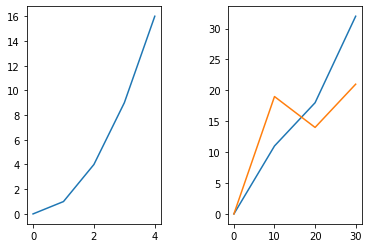

In [6]:
fig, axs = plt.subplots(1, 2)
axs[0].plot([0, 1, 4, 9, 16])                   # 1st subplot
axs[1].plot([0, 10, 20, 30], [0, 11, 18, 32])   # 2nd subplot
axs[1].plot([0, 10, 20, 30], [0, 19, 14, 21])   # another graph on the 2nd subplot
plt.subplots_adjust(wspace=0.5)                 # custom space between plots

In a Jupyter notebook, the plot is displayed automatically.  
In Pycharm, we need to run `plt.show()` to display the open plots.

### Function Graph

A function graph can be displayed Matplotib by plotting the (x, f(x)) couples for a range of x.  
For example, to dra the density function of some normal distributions :

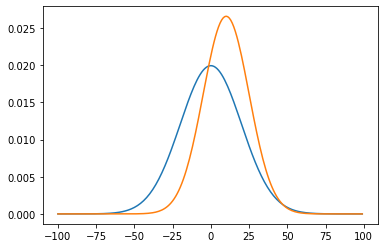

In [20]:
from math import sqrt, exp, pi

# density function of a random variable N(mu, sigma)
def create_f(mu, sigma):
  return lambda x : 1/(sigma * np.sqrt(2*pi)) * np.exp(-pow((x-mu),2)/(2*pow(sigma,2)))

domaine = np.arange(-100,100)
f = create_f(0, 20)               # N(0, 20)
g = create_f(10, 15)              # N(10, 15)
plot = plt.plot(domaine, f(domaine))
plot = plt.plot(domaine, g(domaine))

Or to plot several subplots :

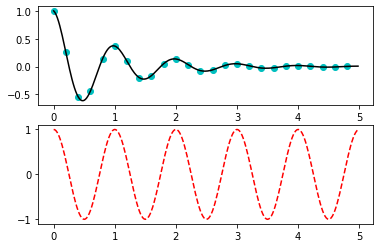

In [16]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.2)     # [0, 0.2,  0.4,  ..., 4.8]
t2 = np.arange(0.0, 5.0, 0.02)    # [0, 0.02, 0.04, ..., 4.98]

plt.subplot(211)  # same as subplot(2, 1, 1) select the 1st plot
plt.plot(t1, f(t1), 'co', t2, f(t2), 'k')

plt.subplot(212)  # same as subplot(2, 1, 2) select the 2nd plot
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

### Axes Metadata
 


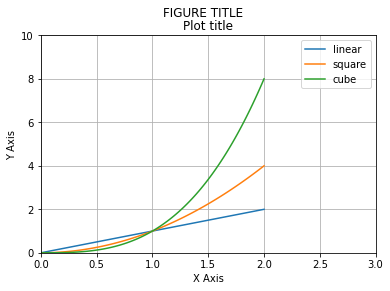

In [149]:
x = np.linspace(0, 2, 100)  # split [0, 2] into an array of 100 values

fig, ax = plt.subplots()
ax.plot(x, x,    label='linear')
ax.plot(x, x**2, label='square')
ax.plot(x, x**3, label='cube')
fig.suptitle('FIGURE TITLE')
ax.set_title('Plot title')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.axis([0, 3, 0, 10])    # min/max for both axis
ax.grid(True)
ax.legend()


We can add annotations on the curve with `annotate()` giving the coordinates of the text and the point to annotate :

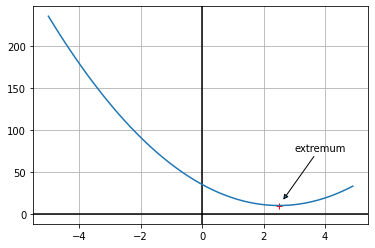

In [204]:
x = np.arange(-5, 5, 0.1)

plt.axhline(0, color='black')    # draw X axis
plt.axvline(0, color='black')    # draw Y axis
plt.grid(True)
plt.annotate('extremum', xy=(2.6, 15), xytext=(3, 75), arrowprops=dict(arrowstyle='-|>'))
plt.plot([2.5], [10], 'r+')       # red cross on the extremum
plt.plot(x, (2*x-5)**2 + 10)

The line color and style can be given in an optional 3rd param of `plot()` function.  
It is made of up to 3 characters :  marker | line | color  
Otherwise we can also use the following named parameters :
* `marker` : Shape of the marker (*, o, ^, +, ...)
* `ms` : Marker size
* `mec` : Marker edge color
* `mfc` : Marker fill color
* `linestype` or `ls` : Style of the line (solid, dashed, dotted...)
* `linewidth` or `lw` : Width of the line
* `color` : line color (letter, color name or hexa value)


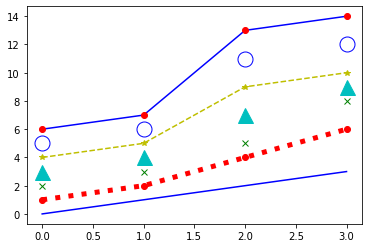

In [63]:
fig, ax = plt.subplots()
ax.plot([0, 1, 2, 3], 'b-')                      # blue line (default)
ax.plot([1, 2, 4, 6], 'ro:', lw=5)               # red dots linked by a thick dotted line
ax.plot([2, 3, 5, 8], 'gx')                      # green crosses
ax.plot([3, 4, 7, 9], 'c^', ms=15)               # cyan big triangles (marker size 15)
ax.plot([4, 5, 9, 10], 'y--', marker='*')        # yellow stars linked by dash line (same as '*y--')
ax.plot([5, 6, 11, 12], 'wo', ms=15, mec='b')    # big white dots with blue border (marker edge color)
ax.plot([6, 7, 13, 14], 'ob-', mec='r', mfc='r') # blue line with red dots (marker edge and fill color)

### Scatter Plot

A scatter plot shows a dot for each (x,y) provided (without a line).

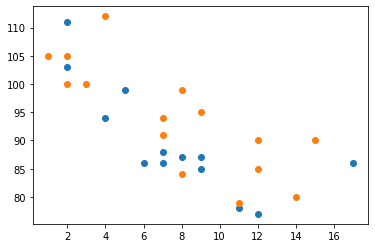

In [72]:
age1 = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
speed1 = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(age1, speed1)

age2 = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
speed2 = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(age2, speed2)

plt.show()

We can use a **color map** (named gradient of colors taking values from 0 to 100).  
Use `colorbar()` to include it in the plot.

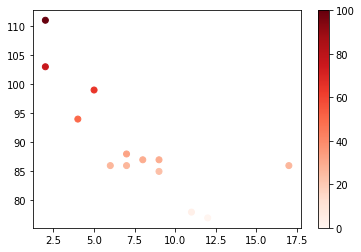

In [83]:
age = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
speed = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array([100 * (j - min(speed)) / (max(speed) - min(speed)) for j in speed])
plt.scatter(x, y, c=colors, cmap='Reds')
plt.colorbar()

We can specify a different size for each dot using the `size` array parameter :

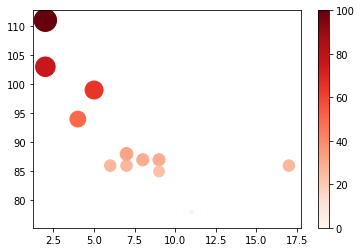

In [101]:
age    = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
speed  = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array([100 * (j - min(speed)) / (max(speed) - min(speed)) for j in speed])
sizes  = np.array([5*x for x in colors])
plt.scatter(x, y, c=colors, cmap='Reds', s=sizes)
plt.colorbar()

We can also use an `alpha` value to set transparency :

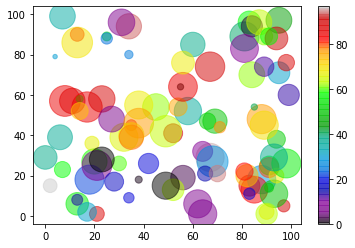

In [107]:
x = np.random.randint(100, size=(100))
y = np.random.randint(100, size=(100))
colors = np.random.randint(100, size=(100))
sizes = 10 * np.random.randint(100, size=(100))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.colorbar()

### Bar plots

Bar plots takes a list of names and a value for each name, and draws a bar for each name.  
Use `bar()` for vertical bars and `barh()` for horizontal bars.

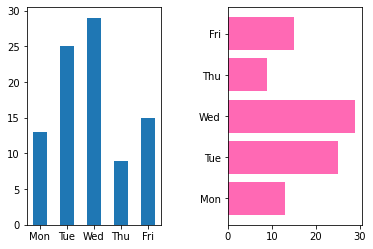

In [124]:
x = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y = np.array([13, 25, 29, 9, 15])
_, axs = plt.subplots(1, 2)
axs[0].bar( x, y, width=0.5)
axs[1].barh(x, y, height=0.8, color='hotpink')
plt.subplots_adjust(wspace=0.5)

### Histogram plots

An histogram shows the number of elements within 2 values.  
It is created with the `hist()` plot function.

(array([ 0.,  9.,  9., 16., 37., 54., 47., 33., 29.,  9.,  5.,  1.,  0.]),
 array([140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
        205]),
 <BarContainer object of 13 artists>)

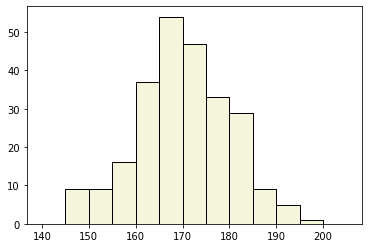

In [25]:
height = np.random.normal(170, 10, 250)  # 250 elems of normal distribution N(170, 10)
plt.hist(height, bins=np.arange(140, 210, 5), color='beige', edgecolor='black')

### Pie plots

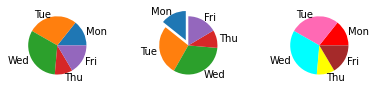

In [144]:
x = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
y = np.array([13, 25, 29, 9, 15])
_, axs = plt.subplots(1, 3)
axs[0].pie(y, labels=x)
axs[1].pie(y, labels=x, startangle=90, explode=[0.2, 0, 0, 0, 0])
axs[2].pie(y, labels=x, colors=['red', 'hotpink', 'cyan', 'yellow', 'brown'])
plt.subplots_adjust(wspace=0.8)

### 3D scatter plot

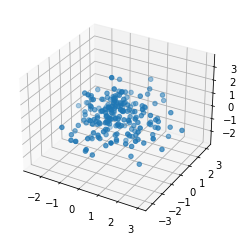

In [214]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.random.randn(20, 10)
y = np.random.randn(20, 10)
z = np.random.randn(20, 10)
ax.scatter(x, y, z)